### Boston House Price
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollers
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in 1000's dollers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [64]:
df.shape

(506, 14)

In [65]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [66]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# EDA

### Univariate Analysis

### Visualize boxplot to show outlier

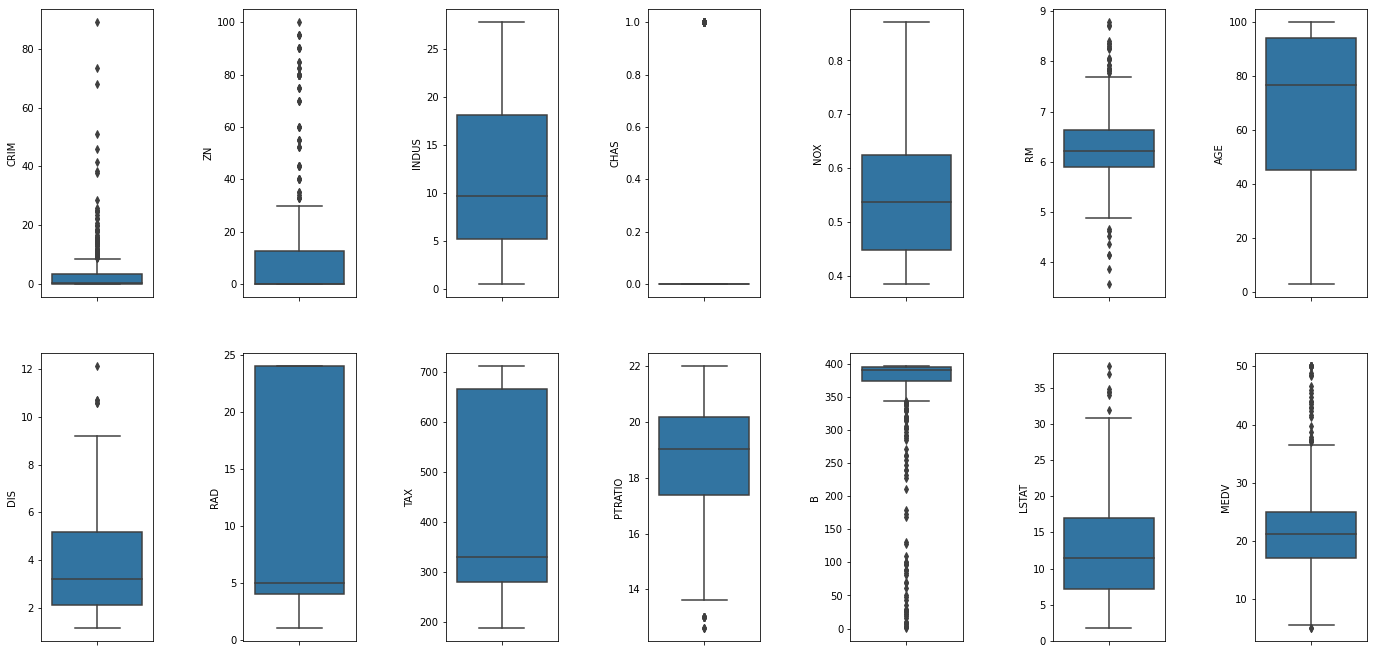

In [67]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index=0
axs = axs.flatten()
for k, v in df.items():
    sns.boxplot(y = k , data=df, ax=axs[index])
    index+=1
plt.tight_layout(h_pad=5.0, w_pad=5.0, pad=4.0)

### Fill missing values

* In CRIM, ZN, CHAS, LSTAT we can show there are many outliers so it will be more benificial if we fill na value with median
* ANd in INDUS, AGE there are no outlier so we can fill na value with mean

In [68]:
df['CRIM'].fillna(df['CRIM'].median(),inplace=True)
df['ZN'].fillna(df['ZN'].median(),inplace=True)
df['CHAS'].fillna(df['CHAS'].median(),inplace=True)
df['LSTAT'].fillna(df['LSTAT'].median(),inplace=True)

In [69]:
df['INDUS'].fillna(df['INDUS'].mean(),inplace=True)
df['AGE'].fillna(df['AGE'].mean(),inplace=True)

In [70]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

* we have handled missing value now there is no missing value

### Let's plot histogram to see ditribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

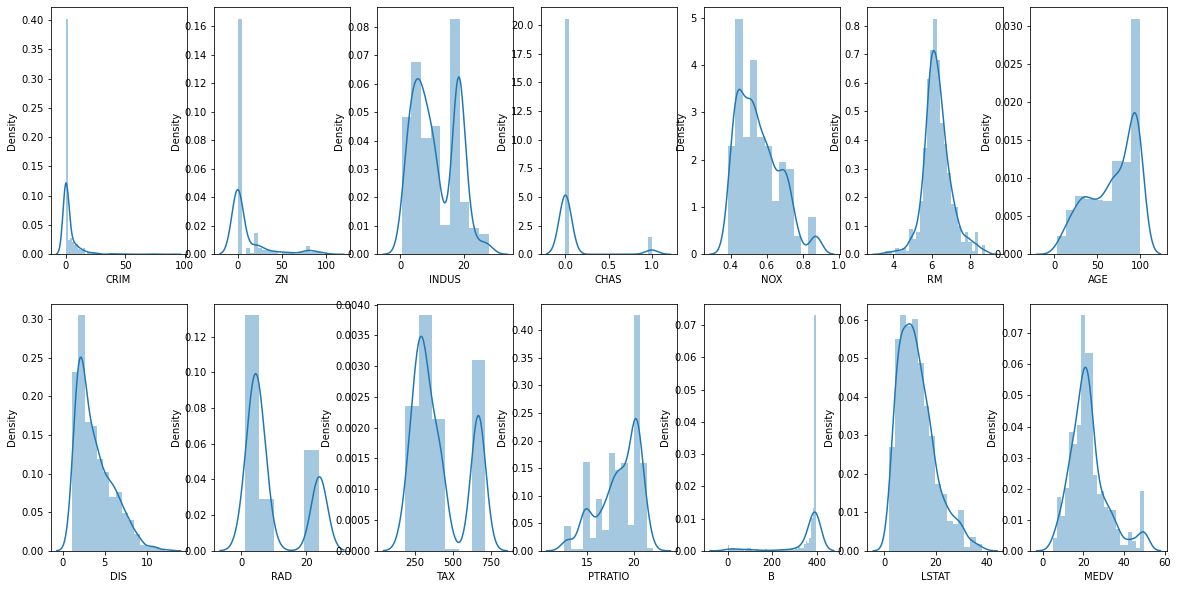

In [71]:
plt.figure(figsize = (20,10))
i = 1
for k,v in df.items():
    plt.subplot(2,7, i)
    sns.distplot(df[k])
    i+=1
plt.show()

## In this dataset we predict price (MEDV) by visualized distplot we can see that  it's right skewed so we can take only that value which is less than 50

In [72]:
df = df[~(df['MEDV']>=50.0)]

In [73]:
df.shape

(490, 14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


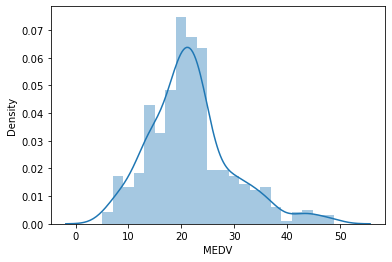

In [74]:
# distplot of MEDV
sns.distplot(df['MEDV'])
plt.show()

* The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Now MEDV looks to have a normal distribution (the target) and other colums seem to have normal or bimodel ditribution of data except CHAS

## Bivariate Analysis

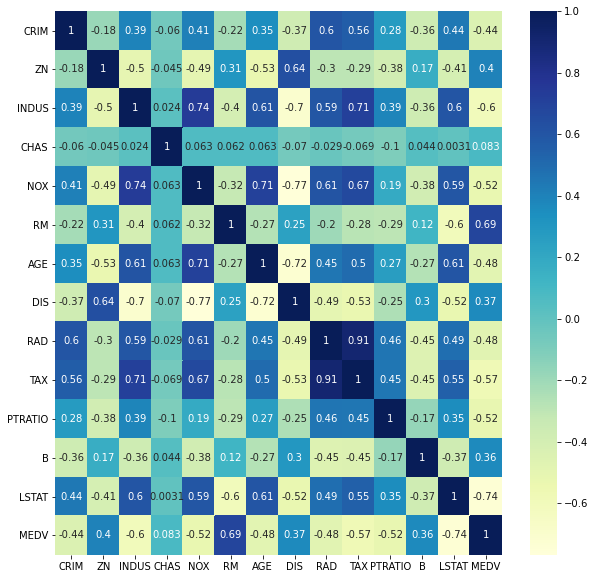

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')
plt.show()

#### Except CRIM, ZN, B,CHAS,DIS other columns have good corr with MEDV

In [76]:
X = df[['INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']]
y = df[['MEDV']]

#### Let's plot these columns against MEDV.

In [77]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = pd.DataFrame(data=ss.fit_transform(X), columns=X.columns)

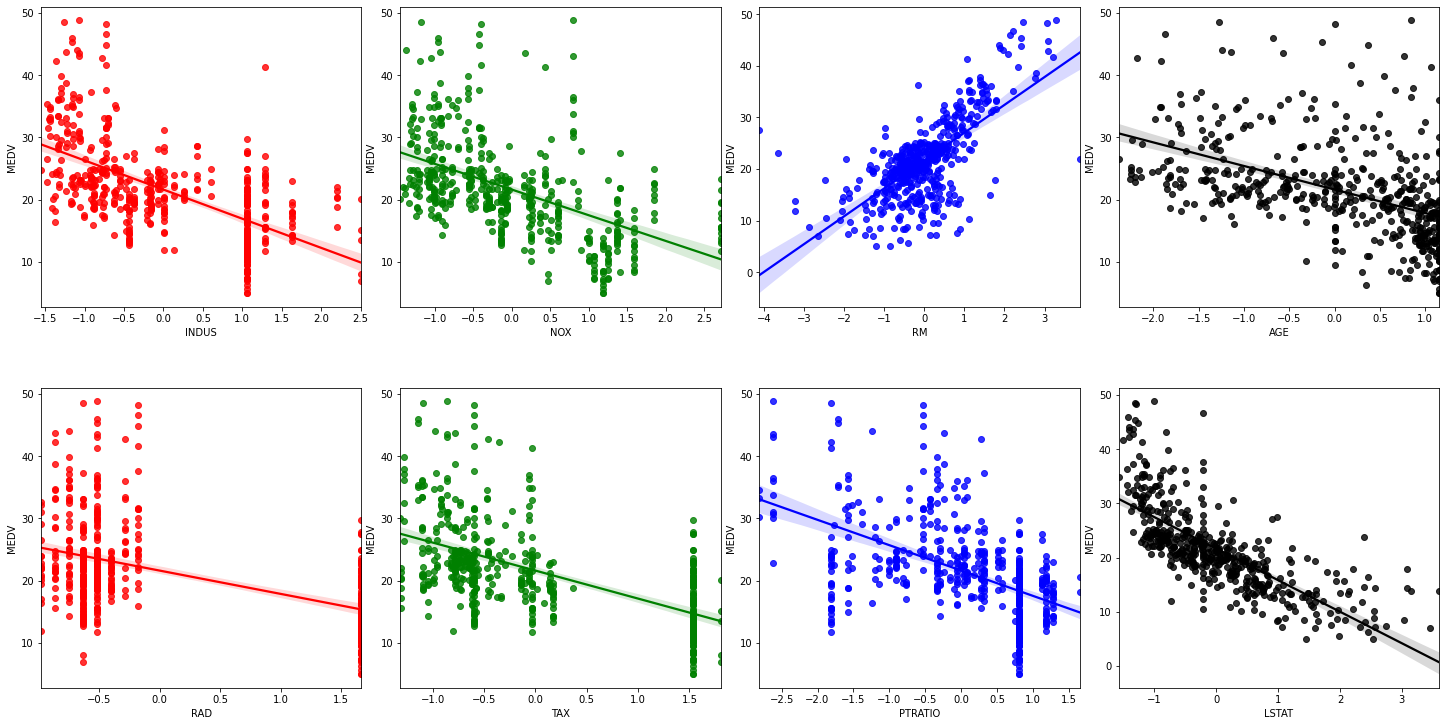

In [79]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
colors=['r','g','blue','black','r','g','blue','black']
index = 0
axs = axs.flatten()
for i, k in X.items():
    sns.regplot(y=y, x=X[i], ax=axs[index],color=colors[index])
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Now calculte percentage of outlier in dataset 

In [80]:
def outlier_per(X):
    for k,v in X.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        IQR = q3 -q1
        outlier = v[(v <= q1 - 1.5*INQ) | (v >= q3 + 1.5*IQR)]
        per = (outlier.shape[0]/v.shape[0])*100.0
        print("column %s percentage outliers: %.2f%%" %(k,per))

In [81]:
outlier_per(X)

column INDUS percentage outliers: 0.00%
column NOX percentage outliers: 0.00%
column RM percentage outliers: 4.08%
column AGE percentage outliers: 0.00%
column RAD percentage outliers: 0.00%
column TAX percentage outliers: 0.00%
column PTRATIO percentage outliers: 0.00%
column LSTAT percentage outliers: 1.43%


In [82]:
outlier_per(y)

column MEDV percentage outliers: 21.84%


### Prepare Data for machine learning algorithm

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [86]:
# for Evaluate algorithm
n_fold = 10
RMS = 'neg_mean_squared_error'

In [120]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [112]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('PolyRidge', make_pipeline(PolynomialFeatures(degree=3), Ridge())))
models.append(('AB', AdaBoostRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('ET', ExtraTreesRegressor()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(('XGB', XGBRegressor()))

### Evaluate model

In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [123]:
results = []
names = []
for name , model in models:
    kfold = KFold(n_splits= n_fold,random_state=42,shuffle=True)
    cv_score = cross_val_score(model, x_train, y_train.values.ravel(), cv=kfold, scoring=RMS)
    results.append(cv_score)
    names.append(name)
    s = "%s: %.3f (%.3f)" % (name, cv_score.mean(), cv_score.std())
    print(s)

LR: -18.471 (8.083)
LASSO: -19.750 (7.816)
EN: -20.733 (7.908)
KNN: -12.205 (4.429)
CART: -20.893 (7.519)
SVR: -13.662 (5.539)
PolyRidge: -12.878 (4.853)
AB: -10.633 (3.598)
RF: -10.784 (3.846)
ET: -9.828 (3.757)
GBM: -9.552 (3.310)
XGB: -11.117 (3.421)


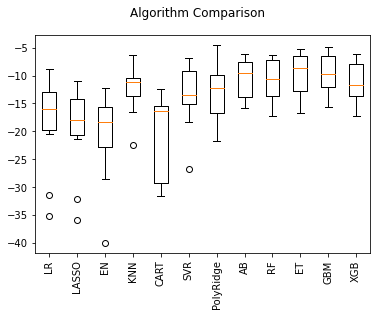

In [124]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation =90)
plt.show()

## Standardize the dataset

In [127]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledPolyRidge', Pipeline([('Scaler', StandardScaler()),('PolyRidge', make_pipeline(PolynomialFeatures(degree=3), Ridge()))])))
pipelines.append(('ScaledAb', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBRegressor())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=n_fold, random_state=42, shuffle=True)
    cv_score = cross_val_score(model, x_train, y_train.values.ravel(), cv=kfold, scoring=RMS)
    results.append(cv_score)
    names.append(name)
    s = "%s: %.3f (%.3f)" % (name, cv_score.mean(), cv_score.std())
    print(s)

ScaledLR: -18.471 (8.083)
ScaledLASSO: -19.828 (7.805)
ScaledEN: -20.889 (7.866)
ScaledKNN: -11.974 (4.303)
ScaledCART: -20.760 (7.310)
ScaledSVR: -13.652 (5.509)
ScaledPolyRidge: -12.836 (4.777)
ScaledAb: -11.135 (3.676)
ScaledRF: -10.544 (3.792)
ScaledET: -9.939 (3.969)
ScaledGBM: -9.540 (3.333)
ScaledXGB: -11.118 (3.417)


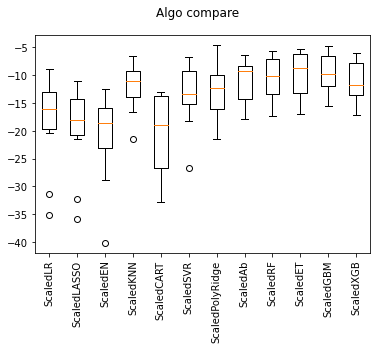

In [129]:
fig = plt.figure()
fig.suptitle("Algo compare")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation = 90)
plt.show()

## we can show that we get better cross_val_score on ScaledGBM

### Now Tune Scaled GBM

In [138]:
from sklearn.model_selection import GridSearchCV
scaled_x_train = StandardScaler().fit_transform(x_train)

n_estimators = [50, 100, 150, 200, 250, 300, 350, 400]
param_grid = {'n_estimators':n_estimators, 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
model = GradientBoostingRegressor(random_state=42)
kfold = KFold(n_splits=n_fold,random_state=42, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=RMS)
grid_score = grid.fit(scaled_x_train,y_train.values.ravel())

print("Best: %f using %s" % (grid_score.best_score_, grid_score.best_params_))
means = grid_score.cv_results_['mean_test_score']
stds = grid_score.cv_results_['std_test_score']
params = grid_score.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -8.757890 using {'learning_rate': 0.05, 'max_depth': 2, 'min_samples_leaf': 9, 'n_estimators': 300}
-9.685728 (2.425163) with: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 50}
-9.302151 (2.711186) with: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 100}
-9.260522 (2.847361) with: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 150}
-9.351481 (2.895201) with: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 200}
-9.514195 (3.100008) with: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 250}
-9.617105 (3.118393) with: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 300}
-9.686822 (3.098331) with: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 350}
-9.727037 (3.065331) with: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 400}
-9.524937 (2.39

## Make predictions on validation dataset

In [140]:
model = GradientBoostingRegressor(learning_rate= 0.05, max_depth= 2, min_samples_leaf= 9, n_estimators= 300, random_state=42)
model.fit(scaled_x_train, y_train.values.ravel())

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_leaf=9,
                          n_estimators=300, random_state=42)

In [133]:
scaled_x_test = StandardScaler().fit_transform(x_test)
y_pred = model.predict(scaled_x_test)
y_pred

array([17.21189711, 25.73225415, 17.57409425, 13.02190227, 10.416672  ,
       21.23782705, 14.64242861, 39.48988237, 20.64854853, 30.06520963,
       21.04315294, 18.84346868, 12.39821641, 18.9289772 , 22.86141922,
       26.79720992, 15.47093391, 15.20862085, 20.47943902, 19.7932224 ,
       22.91053724, 26.13065628, 19.10447515, 44.37320745, 21.42235731,
       23.01405437, 19.30783113, 34.56945286, 37.87443394,  8.88316871,
       25.42851858, 17.97525855, 29.59878394, 27.95210078, 16.05796933,
       23.29436872, 27.04122433, 21.98722936, 42.80456052, 36.27878895,
       17.15611161, 20.14456022, 15.20460482, 15.87346168, 18.89410098,
       23.55455279, 18.08449132, 15.24260836, 21.12418664, 21.07397953,
       14.86680089, 29.94260906, 25.50062216, 20.91096037, 22.52355819,
       24.95245234, 16.53734179, 26.98724263, 24.52676648, 11.80682152,
       20.82999403, 14.60219189, 30.29821141, 23.7799268 , 31.18813967,
       46.74390528, 26.2693951 , 30.80782731, 13.84517574, 21.60

In [135]:
from sklearn import metrics

In [136]:
print("MAE",metrics.mean_absolute_error(y_test, y_pred))
print("MSE",metrics.mean_squared_error(y_test, y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 2.927767448067957
MSE 14.904447489958512
RMSE 3.8606278621434766


In [137]:
print("r2_score" , metrics.r2_score(y_test, y_pred))

r2_score 0.7082442342865665


In [ ]:
import pickle
# create file to save model
file = open('boston_house_prediction.pkl','wb')

#dump information to that file
pickle.dump(model, file)